In [39]:
import pandas as pd
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
x=pd.read_csv("Dataset_(Task-1).csv")

In [40]:
x.head()

,"Flow Depth, D [m]",SLOPE,CHARGE,"Channel Width, B [m]","Particle size, d [m]",Bed Form
0,5.09,0.000204,34721.4,306.0,0.000978,2
1,5.09,0.000098,15114.2,261.0,0.000978,2
2,4.89,0.000077,7200.2,258.0,0.000978,2
3,4.79,0.000066,5243.3,257.0,0.000978,2
4,3.54,0.000348,125324.7,449.2,0.000978,2


In [41]:
x.isnull().sum()

Flow Depth, D [m]       4
SLOPE                   4
CHARGE                  0
Channel Width, B [m]    4
Particle size, d [m]    4
Bed Form                0
dtype: int64

In [42]:
x=x.dropna()

In [43]:
x.isnull().sum()

Flow Depth, D [m]       0
SLOPE                   0
CHARGE                  0
Channel Width, B [m]    0
Particle size, d [m]    0
Bed Form                0
dtype: int64

In [46]:
X = x.drop("Bed Form", axis=1)
y = x["Bed Form"]

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [49]:
print(x.shape)
print(y.shape)

(2548, 6)
(2548,)


In [50]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

In [51]:
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(50,30),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, random_state=42)

In [56]:
y_pred = mlp.predict(x_test)

In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9705882352941176


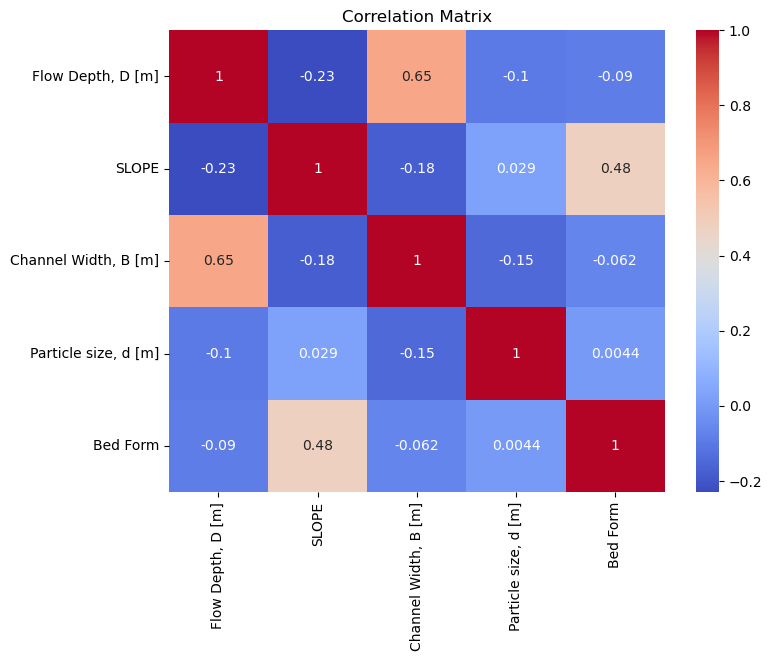

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()